In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Data Loading

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/Machine Learning/Lung/lung_cancer_mortality_data_large_v2.csv')
data

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,3249996,45.0,Male,Poland,2020-03-11,Stage IV,2020-03-18,No,Current Smoker,31.0,273,1,1,0,0,Chemotherapy,2020-11-26,1
3249996,3249997,51.0,Male,Italy,2016-11-16,Stage IV,2016-11-22,Yes,Current Smoker,41.2,279,1,1,0,0,Surgery,2018-04-10,0
3249997,3249998,45.0,Male,Finland,2021-07-18,Stage III,2021-07-30,Yes,Current Smoker,18.2,187,1,1,0,0,Combined,2022-03-16,0
3249998,3249999,45.0,Male,Hungary,2020-07-25,Stage I,2020-07-30,No,Passive Smoker,40.2,271,1,0,0,0,Surgery,2022-02-28,0


In [ ]:
data.head(10)

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
5,6,50.0,Male,Finland,2023-01-04,Stage II,2023-01-12,Yes,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
6,7,49.0,Male,Denmark,2018-05-23,Stage IV,2018-05-30,No,Former Smoker,30.1,300,1,1,0,1,Chemotherapy,2019-07-07,0
7,8,51.0,Female,France,2017-02-20,Stage II,2017-02-23,Yes,Former Smoker,44.3,244,1,0,0,0,Combined,2018-10-09,0
8,9,64.0,Female,Slovakia,2021-03-23,Stage I,2021-04-03,Yes,Passive Smoker,26.9,161,1,0,0,0,Surgery,2023-02-13,0
9,10,56.0,Male,Hungary,2021-12-02,Stage III,2021-12-04,Yes,Passive Smoker,40.9,286,1,1,0,0,Chemotherapy,2023-07-07,1


# Exploring Dataset

In [ ]:
data.shape

(3250000, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   age                          float64
 2   gender                       object 
 3   country                      object 
 4   diagnosis_date               object 
 5   cancer_stage                 object 
 6   beginning_of_treatment_date  object 
 7   family_history               object 
 8   smoking_status               object 
 9   bmi                          float64
 10  cholesterol_level            int64  
 11  hypertension                 int64  
 12  asthma                       int64  
 13  cirrhosis                    int64  
 14  other_cancer                 int64  
 15  treatment_type               object 
 16  end_treatment_date           object 
 17  survived                     int64  
dtypes: float64(2), int64(7), object(9)
memory 

In [ ]:
data.nunique()

,0
id,3250000
age,98
gender,2
country,27
diagnosis_date,3651
cancer_stage,4
beginning_of_treatment_date,3680
family_history,2
smoking_status,4
bmi,291


In [ ]:
data.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06
mean,1.625000e+06,5.499969e+01,3.049276e+01,2.336376e+02,7.498375e-01,4.687280e-01,2.265831e-01,8.802738e-02,2.196006e-01
std,9.381943e+05,1.000122e+01,8.371494e+00,4.344851e+01,4.331065e-01,4.990212e-01,4.186206e-01,2.833348e-01,4.139761e-01
min,1.000000e+00,4.000000e+00,1.600000e+01,1.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.125008e+05,4.800000e+01,2.320000e+01,1.960000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.625000e+06,5.500000e+01,3.050000e+01,2.420000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.437500e+06,6.200000e+01,3.770000e+01,2.710000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.250000e+06,1.040000e+02,4.500000e+01,3.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
data.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'beginning_of_treatment_date', 'family_history', 'smoking_status',
       'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis',
       'other_cancer', 'treatment_type', 'end_treatment_date', 'survived'],
      dtype='object')

In [ ]:
data.dtypes

,0
id,int64
age,float64
gender,object
country,object
diagnosis_date,object
cancer_stage,object
beginning_of_treatment_date,object
family_history,object
smoking_status,object
bmi,float64


DATA CLEANING

In [ ]:
data.isna().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
beginning_of_treatment_date,0
family_history,0
smoking_status,0
bmi,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['survived'].value_counts()

,count
survived,
0,2536298
1,713702


 **EXPLORATORY** **DATA** **ANALYSIS**

# Survived by country

In [ ]:
survived_data=data.groupby("country")[["survived"]].agg("sum")
survived_data

,survived
country,
Austria,26778
Belgium,26435
Bulgaria,26633
Croatia,26259
Cyprus,26703
Czech Republic,26525
Denmark,26575
Estonia,26351
Finland,26478


# Gender Distribution

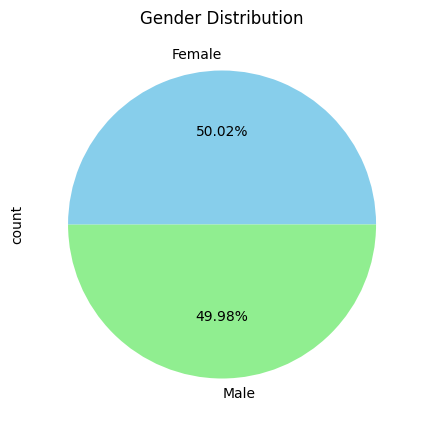

In [ ]:
plt.figure(figsize=(10,5))
data['gender'].value_counts().plot.pie(autopct='%.2f%%',colors=['skyblue','lightgreen'])
plt.title('Gender Distribution')
plt.show()

# Country Distribution

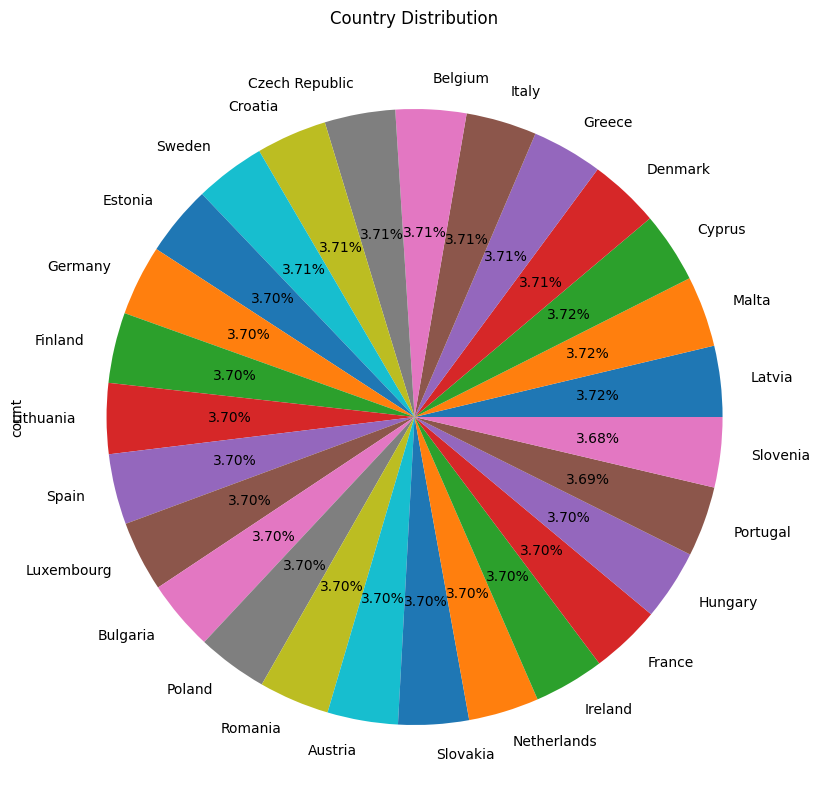

In [ ]:
plt.figure(figsize=(10,10))
data['country'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('Country Distribution')
plt.show()


# Asthma counts


<Axes: xlabel='asthma'>

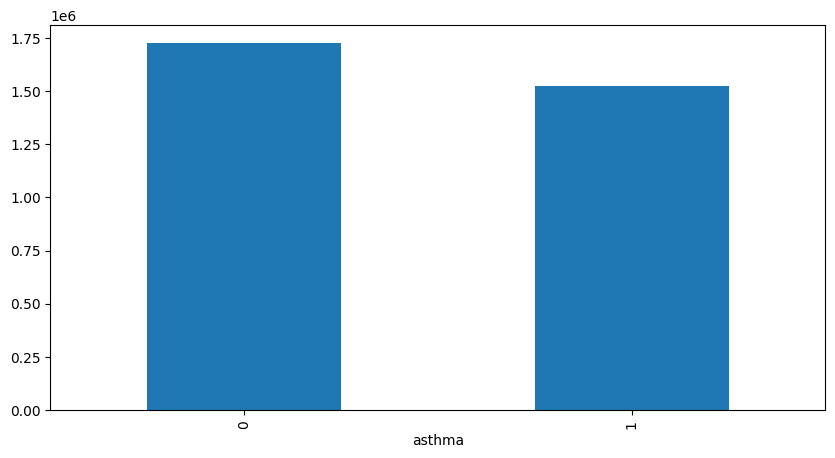

In [ ]:
plt.figure(figsize=(10,5))
data['asthma'].value_counts().plot.bar()

# Age Distribution

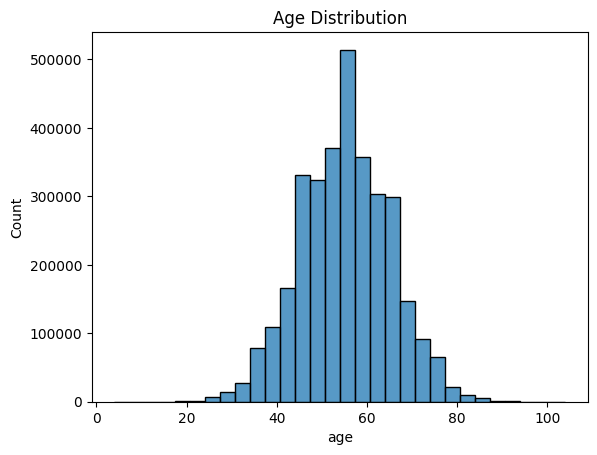

In [ ]:
sns.histplot(data['age'],bins=30)
plt.title("Age Distribution")
plt.show()


# Survival based on Smoking Status

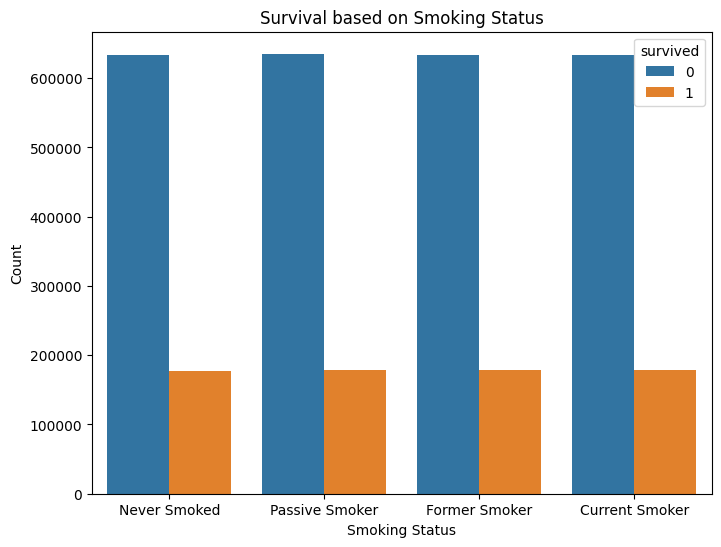

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data,x='smoking_status',hue='survived')
plt.title('Survival based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

## **Survival based on cancer stage**

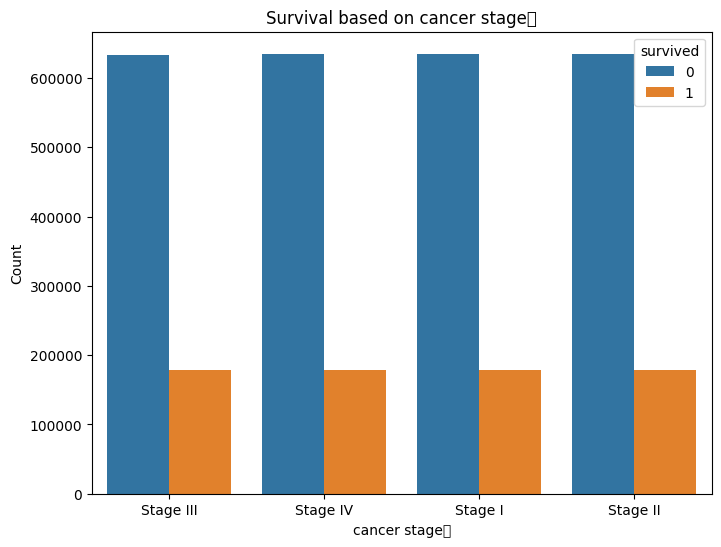

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data,x='cancer_stage',hue='survived')
plt.title('Survival based on cancer stage	')
plt.xlabel('cancer stage	')
plt.ylabel('Count')
plt.show()

**MODEL** **TRAINING**

In [ ]:
data=data.drop(['id','country','diagnosis_date','beginning_of_treatment_date','end_treatment_date'],axis=1)
data

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,Female,Stage III,No,Never Smoked,31.1,257,1,1,0,0,Combined,0
1,50.0,Male,Stage III,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,0
2,65.0,Male,Stage IV,No,Never Smoked,18.9,193,0,0,0,0,Surgery,0
3,51.0,Female,Stage III,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,1
4,37.0,Male,Stage I,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,45.0,Male,Stage IV,No,Current Smoker,31.0,273,1,1,0,0,Chemotherapy,1
3249996,51.0,Male,Stage IV,Yes,Current Smoker,41.2,279,1,1,0,0,Surgery,0
3249997,45.0,Male,Stage III,Yes,Current Smoker,18.2,187,1,1,0,0,Combined,0
3249998,45.0,Male,Stage I,No,Passive Smoker,40.2,271,1,0,0,0,Surgery,0


In [ ]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['cancer_stage']=le.fit_transform(data['cancer_stage'])
data['family_history']=le.fit_transform(data['family_history'])
data['smoking_status']=le.fit_transform(data['smoking_status'])
data['treatment_type']=le.fit_transform(data['treatment_type'])
data

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,0,2,0,2,31.1,257,1,1,0,0,1,0
1,50.0,1,2,1,3,25.9,208,1,0,0,0,2,0
2,65.0,1,3,0,2,18.9,193,0,0,0,0,3,0
3,51.0,0,2,1,1,34.6,249,1,1,1,0,3,1
4,37.0,1,0,1,2,40.2,262,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,45.0,1,3,0,0,31.0,273,1,1,0,0,0,1
3249996,51.0,1,3,1,0,41.2,279,1,1,0,0,3,0
3249997,45.0,1,2,1,0,18.2,187,1,1,0,0,1,0
3249998,45.0,1,0,0,3,40.2,271,1,0,0,0,3,0


In [ ]:
x=data.drop('survived',axis=1)
y=data['survived']
x

,age,gender,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type
0,64.0,0,2,0,2,31.1,257,1,1,0,0,1
1,50.0,1,2,1,3,25.9,208,1,0,0,0,2
2,65.0,1,3,0,2,18.9,193,0,0,0,0,3
3,51.0,0,2,1,1,34.6,249,1,1,1,0,3
4,37.0,1,0,1,2,40.2,262,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,45.0,1,3,0,0,31.0,273,1,1,0,0,0
3249996,51.0,1,3,1,0,41.2,279,1,1,0,0,3
3249997,45.0,1,2,1,0,18.2,187,1,1,0,0,1
3249998,45.0,1,0,0,3,40.2,271,1,0,0,0,3


In [ ]:
y

,survived
0,0
1,0
2,0
3,1
4,0
...,...
3249995,1
3249996,0
3249997,0
3249998,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
Log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=7)
Tree_score=cross_val_score(DecisionTreeClassifier(max_depth=5),X=x,y=y,cv=7)
Knn_score=cross_val_score(KNeighborsClassifier(),X=x,y=y,cv=7)
Nb_score=cross_val_score(GaussianNB(),X=x,y=y,cv=7)
Gradient_score=cross_val_score(GradientBoostingClassifier(),X=x,y=y,cv=7)
Ada_score=cross_val_score(AdaBoostClassifier(),X=x,y=y,cv=7)

In [ ]:
print(Log_score)
print(Tree_score)
print(Knn_score)
print(Nb_score)
print(Gradient_score)
print(Ada_score)

[0.78040044 0.78040044 0.78039829 0.78039829 0.78039829 0.78039997
 0.78039997]
[0.78040044 0.7804026  0.78039614 0.78039829 0.78039398 0.78039997
 0.78039997]
[0.73911339 0.73814416 0.73876447 0.73878816 0.73884631 0.73927006
 0.73939498]
[0.78040044 0.78040044 0.78039829 0.78039829 0.78039829 0.78039997
 0.78039997]
[0.7804026  0.78040044 0.78039829 0.78039829 0.78039829 0.78040212
 0.78039997]
[0.78040044 0.78040044 0.78039829 0.78039829 0.78039829 0.78039997
 0.78039997]


In [ ]:
print(np.mean(Log_score))
print(np.mean(Tree_score))
print(np.mean(Knn_score))
print(np.mean(Nb_score))
print(np.mean(Gradient_score))
print(np.mean(Ada_score))

0.7803993846157448
0.780398769231508
0.7389030771873507
0.7803993846157448
0.7804000000006441
0.7803993846157448


In [ ]:
model=DecisionTreeClassifier(class_weight='balanced')

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
gscv=GridSearchCV(model,{'max_depth':[3,5,7,10,15,20,None],
        'min_samples_split':[2,5,10,20],
        'min_samples_leaf':[1,2,4,8]},cv=7)
gscv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]})

In [ ]:
gs_data=gscv.cv_results_

In [ ]:
df=pd.DataFrame(gs_data)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,4.990241,0.277369,0.041059,0.004991,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.374053,0.352509,0.419445,0.392414,0.455978,0.540972,0.443313,0.425526,0.058169,97
1,4.974641,0.161021,0.041926,0.005376,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.374053,0.352509,0.419445,0.392414,0.455978,0.540972,0.443313,0.425526,0.058169,97
2,4.947152,0.207503,0.042031,0.005723,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.374053,0.352509,0.419445,0.392414,0.455978,0.540972,0.443313,0.425526,0.058169,97
3,4.878291,0.163118,0.042135,0.005676,3,1,20,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.374053,0.352509,0.419445,0.392414,0.455978,0.540972,0.443313,0.425526,0.058169,97
4,4.965811,0.147472,0.042340,0.004992,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.374053,0.352509,0.419445,0.392414,0.455978,0.540972,0.443313,0.425526,0.058169,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,25.015975,1.054676,0.302899,0.042527,None,4,20,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.539088,0.538046,0.538232,0.540149,0.539017,0.539733,0.538702,0.538995,0.000702,12
108,25.243255,0.882878,0.315922,0.028036,None,8,2,"{'max_depth': None, 'min_samples_leaf': 8, 'mi...",0.531585,0.531722,0.531526,0.533141,0.533013,0.532739,0.531979,0.532243,0.000647,15
109,24.958882,1.059423,0.306478,0.025766,None,8,5,"{'max_depth': None, 'min_samples_leaf': 8, 'mi...",0.531714,0.531752,0.531566,0.533181,0.532671,0.532537,0.531899,0.532188,0.000564,16
110,25.532126,0.839131,0.312595,0.056082,None,8,10,"{'max_depth': None, 'min_samples_leaf': 8, 'mi...",0.531582,0.531867,0.531426,0.533566,0.532647,0.532935,0.531829,0.532265,0.000737,14


In [ ]:
gscv.best_score_

0.6559403841982057

In [ ]:
y_pred=gscv.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
df_data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_data

,Actual,Predicted
1552387,0,0
2568111,0,0
1904330,0,0
2838421,0,0
1226147,0,0
...,...,...
2848480,0,0
994211,1,0
2349534,0,1
2739479,0,0


In [ ]:
prediction=gscv.predict([[45.0,1,3,0,0,31.0,273,1,1,0,0,0]])
prediction

array([1])

In [ ]:
prediction=gscv.predict([[51.0,1,3,1,0,41.2,279,1,1,0,0,3]])
prediction

array([0])

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[395038, 112007],
       [111267,  31688]])

In [ ]:
data['survived'].value_counts()


,count
survived,
0,2536298
1,713702


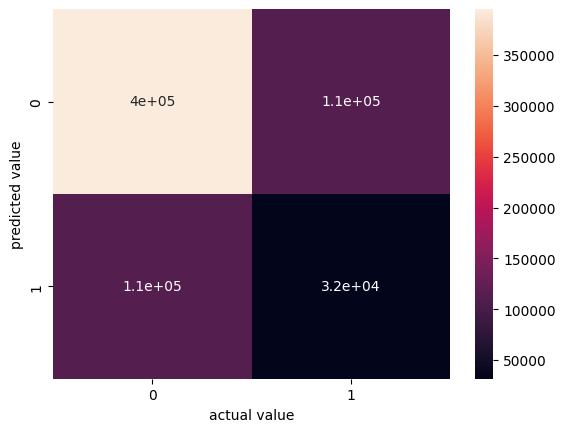

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

## Conclusion

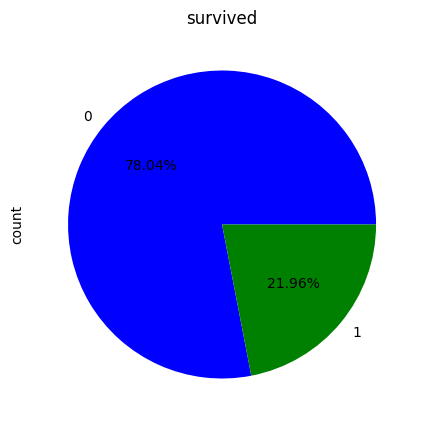

In [ ]:
plt.figure(figsize=(10,5))
data['survived'].value_counts().plot.pie(autopct='%.2f%%',colors=['blue','green'])
plt.title('survived')
plt.show()

In [ ]:
h